# 📊 Comprehensive analysis of store performance and sales patterns

In [1]:
#bib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## 1. DATA LOADING AND INSPECTION

In [2]:
#load data
df = pd.read_csv("/kaggle/input/walmart-sales-analysis/Walmart_sales_analysis.csv")

In [3]:
def load_and_inspect_data(df):
    """
    Load and perform initial inspection of Walmart sales data
    """
    print("\n📋 DATASET OVERVIEW")
    print("-" * 30)
    
    print(f"Dataset Shape: {df.shape}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")
    
    print("\n📊 COLUMN INFORMATION:")
    print(df.info())
    
    print("\n🔍 FIRST 5 ROWS:")
    print(df.head())
    
    print("\n📈 STATISTICAL SUMMARY:")
    print(df.describe())
    
    return df
load_and_inspect_data(df)


📋 DATASET OVERVIEW
------------------------------
Dataset Shape: (6435, 8)
Memory Usage: 1124.1 KB

📊 COLUMN INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store_Number  6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   object 
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6    CPI          6435 non-null   int64  
 7   Unemployment  6435 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 402.3+ KB
None

🔍 FIRST 5 ROWS:
   Store_Number       Date Weekly_Sales  Holiday_Flag  Temperature  \
0             1   2/5/2010    1,643,691             0        42.31   
1             1  2/12/2010    1,641,957             1        38.51   
2             1  2/19/2010    1,611,968      

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2/5/2010,"1,643,691",0,42.31,2.572,211,8.106
1,1,2/12/2010,"1,641,957",1,38.51,2.548,211,8.106
2,1,2/19/2010,"1,611,968",0,39.93,2.514,211,8.106
3,1,2/26/2010,"1,409,728",0,46.63,2.561,211,8.106
4,1,3/5/2010,"1,554,807",0,46.50,2.625,211,8.106
...,...,...,...,...,...,...,...,...
6430,45,9/28/2012,"713,174",0,64.88,3.997,192,8.684
6431,45,10/5/2012,"733,455",0,64.89,3.985,192,8.667
6432,45,10/12/2012,"734,464",0,54.47,4.000,192,8.667
6433,45,10/19/2012,"718,126",0,56.47,3.969,192,8.667


## 2. DATA PREPROCESSING

In [4]:
def preprocess_data(df):
    """
    Clean and preprocess the Walmart sales data
    """
    print("\n🔧 DATA PREPROCESSING")
    print("-" * 30)
    
    # Create a copy for processing
    df_processed = df.copy()
    
    # Convert Date column to datetime
    df_processed['Date'] = pd.to_datetime(df_processed['Date'])
    
    # Handle Weekly_Sales conversion (assuming it might be stored as string)
    if df_processed['Weekly_Sales'].dtype == 'object':
        # Remove any currency symbols or commas
        df_processed['Weekly_Sales'] = df_processed['Weekly_Sales'].astype(str).str.replace('$', '').str.replace(',', '')
        df_processed['Weekly_Sales'] = pd.to_numeric(df_processed['Weekly_Sales'], errors='coerce')
    
    # Create additional time-based features
    df_processed['Year'] = df_processed['Date'].dt.year
    df_processed['Month'] = df_processed['Date'].dt.month
    df_processed['Quarter'] = df_processed['Date'].dt.quarter
    df_processed['Week'] = df_processed['Date'].dt.isocalendar().week
    df_processed['Month_Name'] = df_processed['Date'].dt.month_name()
    
    # Create season feature
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'
    
    df_processed['Season'] = df_processed['Month'].apply(get_season)
    
    # Check for missing values
    missing_values = df_processed.isnull().sum()
    print(f"Missing values per column:\n{missing_values}")
    
    # Check for duplicates
    duplicates = df_processed.duplicated().sum()
    print(f"Duplicate records: {duplicates}")
    
    print(f"✅ Data preprocessing completed")
    print(f"Final dataset shape: {df_processed.shape}")
    
    return df_processed

In [5]:
preprocess_data(df)


🔧 DATA PREPROCESSING
------------------------------
Missing values per column:
Store_Number    0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
 CPI            0
Unemployment    0
Year            0
Month           0
Quarter         0
Week            0
Month_Name      0
Season          0
dtype: int64
Duplicate records: 0
✅ Data preprocessing completed
Final dataset shape: (6435, 14)


,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter,Week,Month_Name,Season
0,1,2010-02-05,1643691,0,42.31,2.572,211,8.106,2010,2,1,5,February,Winter
1,1,2010-02-12,1641957,1,38.51,2.548,211,8.106,2010,2,1,6,February,Winter
2,1,2010-02-19,1611968,0,39.93,2.514,211,8.106,2010,2,1,7,February,Winter
3,1,2010-02-26,1409728,0,46.63,2.561,211,8.106,2010,2,1,8,February,Winter
4,1,2010-03-05,1554807,0,46.50,2.625,211,8.106,2010,3,1,9,March,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713174,0,64.88,3.997,192,8.684,2012,9,3,39,September,Fall
6431,45,2012-10-05,733455,0,64.89,3.985,192,8.667,2012,10,4,40,October,Fall
6432,45,2012-10-12,734464,0,54.47,4.000,192,8.667,2012,10,4,41,October,Fall
6433,45,2012-10-19,718126,0,56.47,3.969,192,8.667,2012,10,4,42,October,Fall


In [6]:
df = preprocess_data(df)


🔧 DATA PREPROCESSING
------------------------------
Missing values per column:
Store_Number    0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
 CPI            0
Unemployment    0
Year            0
Month           0
Quarter         0
Week            0
Month_Name      0
Season          0
dtype: int64
Duplicate records: 0
✅ Data preprocessing completed
Final dataset shape: (6435, 14)


## 3. EXPLORATORY DATA ANALYSIS

In [7]:
def perform_eda(df):
    """
    Comprehensive Exploratory Data Analysis
    """
    print("EXPLORATORY DATA ANALYSIS")
    print("-" * 40)
    
    # Basic statistics
    print("KEY METRICS:")
    print(f"Total Stores: {df['Store_Number'].nunique()}")
    print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")
    print(f"Total Weeks Analyzed: {df['Date'].nunique()}")
    print(f"Average Weekly Sales: ${df['Weekly_Sales'].mean():,.2f}")
    print(f"Total Sales Volume: ${df['Weekly_Sales'].sum():,.2f}")
    
    # Store distribution
    print("STORE DISTRIBUTION:")
    store_counts = df['Store_Number'].value_counts().sort_index()
    print(f"Records per store: {store_counts.describe()}")
    
    # Holiday analysis
    holiday_analysis = df.groupby('Holiday_Flag')['Weekly_Sales'].agg(['count', 'mean', 'std'])
    print("HOLIDAY vs NON-HOLIDAY SALES:")
    print(holiday_analysis)
    
    return df

In [8]:
perform_eda(df)

EXPLORATORY DATA ANALYSIS
----------------------------------------
KEY METRICS:
Total Stores: 45
Date Range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00
Total Weeks Analyzed: 143
Average Weekly Sales: $1,046,964.88
Total Sales Volume: $6,737,219,008.00
STORE DISTRIBUTION:
Records per store: count     45.0
mean     143.0
std        0.0
min      143.0
25%      143.0
50%      143.0
75%      143.0
max      143.0
Name: count, dtype: float64
HOLIDAY vs NON-HOLIDAY SALES:
              count          mean            std
Holiday_Flag                                    
0              5985  1.041256e+06  558957.434617
1               450  1.122888e+06  627684.934637


,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter,Week,Month_Name,Season
0,1,2010-02-05,1643691,0,42.31,2.572,211,8.106,2010,2,1,5,February,Winter
1,1,2010-02-12,1641957,1,38.51,2.548,211,8.106,2010,2,1,6,February,Winter
2,1,2010-02-19,1611968,0,39.93,2.514,211,8.106,2010,2,1,7,February,Winter
3,1,2010-02-26,1409728,0,46.63,2.561,211,8.106,2010,2,1,8,February,Winter
4,1,2010-03-05,1554807,0,46.50,2.625,211,8.106,2010,3,1,9,March,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713174,0,64.88,3.997,192,8.684,2012,9,3,39,September,Fall
6431,45,2012-10-05,733455,0,64.89,3.985,192,8.667,2012,10,4,40,October,Fall
6432,45,2012-10-12,734464,0,54.47,4.000,192,8.667,2012,10,4,41,October,Fall
6433,45,2012-10-19,718126,0,56.47,3.969,192,8.667,2012,10,4,42,October,Fall


In [9]:
def create_visualizations(df):
    """
    Create comprehensive visualizations
    """
    print("CREATING VISUALIZATIONS")
    print("-" * 30)
    
    # Set up the plotting environment
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Walmart Sales Analysis - Overview Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Sales distribution
    axes[0, 0].hist(df['Weekly_Sales'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Distribution of Weekly Sales')
    axes[0, 0].set_xlabel('Weekly Sales ($)')
    axes[0, 0].set_ylabel('Frequency')
    
    # 2. Sales by store
    store_sales = df.groupby('Store_Number')['Weekly_Sales'].mean().sort_values(ascending=False)
    axes[0, 1].bar(range(len(store_sales)), store_sales.values, color='lightcoral')
    axes[0, 1].set_title('Average Weekly Sales by Store')
    axes[0, 1].set_xlabel('Store (Ranked)')
    axes[0, 1].set_ylabel('Average Weekly Sales ($)')
    
    # 3. Holiday vs Non-Holiday
    holiday_data = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
    axes[0, 2].bar(['Non-Holiday', 'Holiday'], holiday_data.values, color=['lightblue', 'orange'])
    axes[0, 2].set_title('Holiday vs Non-Holiday Sales')
    axes[0, 2].set_ylabel('Average Weekly Sales ($)')
    
    # 4. Seasonal trends
    seasonal_sales = df.groupby('Season')['Weekly_Sales'].mean()
    axes[1, 0].bar(seasonal_sales.index, seasonal_sales.values, color='lightgreen')
    axes[1, 0].set_title('Seasonal Sales Patterns')
    axes[1, 0].set_ylabel('Average Weekly Sales ($)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 5. Temperature vs Sales correlation
    axes[1, 1].scatter(df['Temperature'], df['Weekly_Sales'], alpha=0.5, color='purple')
    axes[1, 1].set_title('Temperature vs Weekly Sales')
    axes[1, 1].set_xlabel('Temperature (°F)')
    axes[1, 1].set_ylabel('Weekly Sales ($)')
    
    # 6. Fuel Price vs Sales correlation
    axes[1, 2].scatter(df['Fuel_Price'], df['Weekly_Sales'], alpha=0.5, color='red')
    axes[1, 2].set_title('Fuel Price vs Weekly Sales')
    axes[1, 2].set_xlabel('Fuel Price ($)')
    axes[1, 2].set_ylabel('Weekly Sales ($)')
    
    plt.tight_layout()
    plt.show()
    
    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price',' CPI ', 'Unemployment', 'Holiday_Flag']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix - Sales and External Factors')
    plt.tight_layout()
    plt.show()

CREATING VISUALIZATIONS
------------------------------


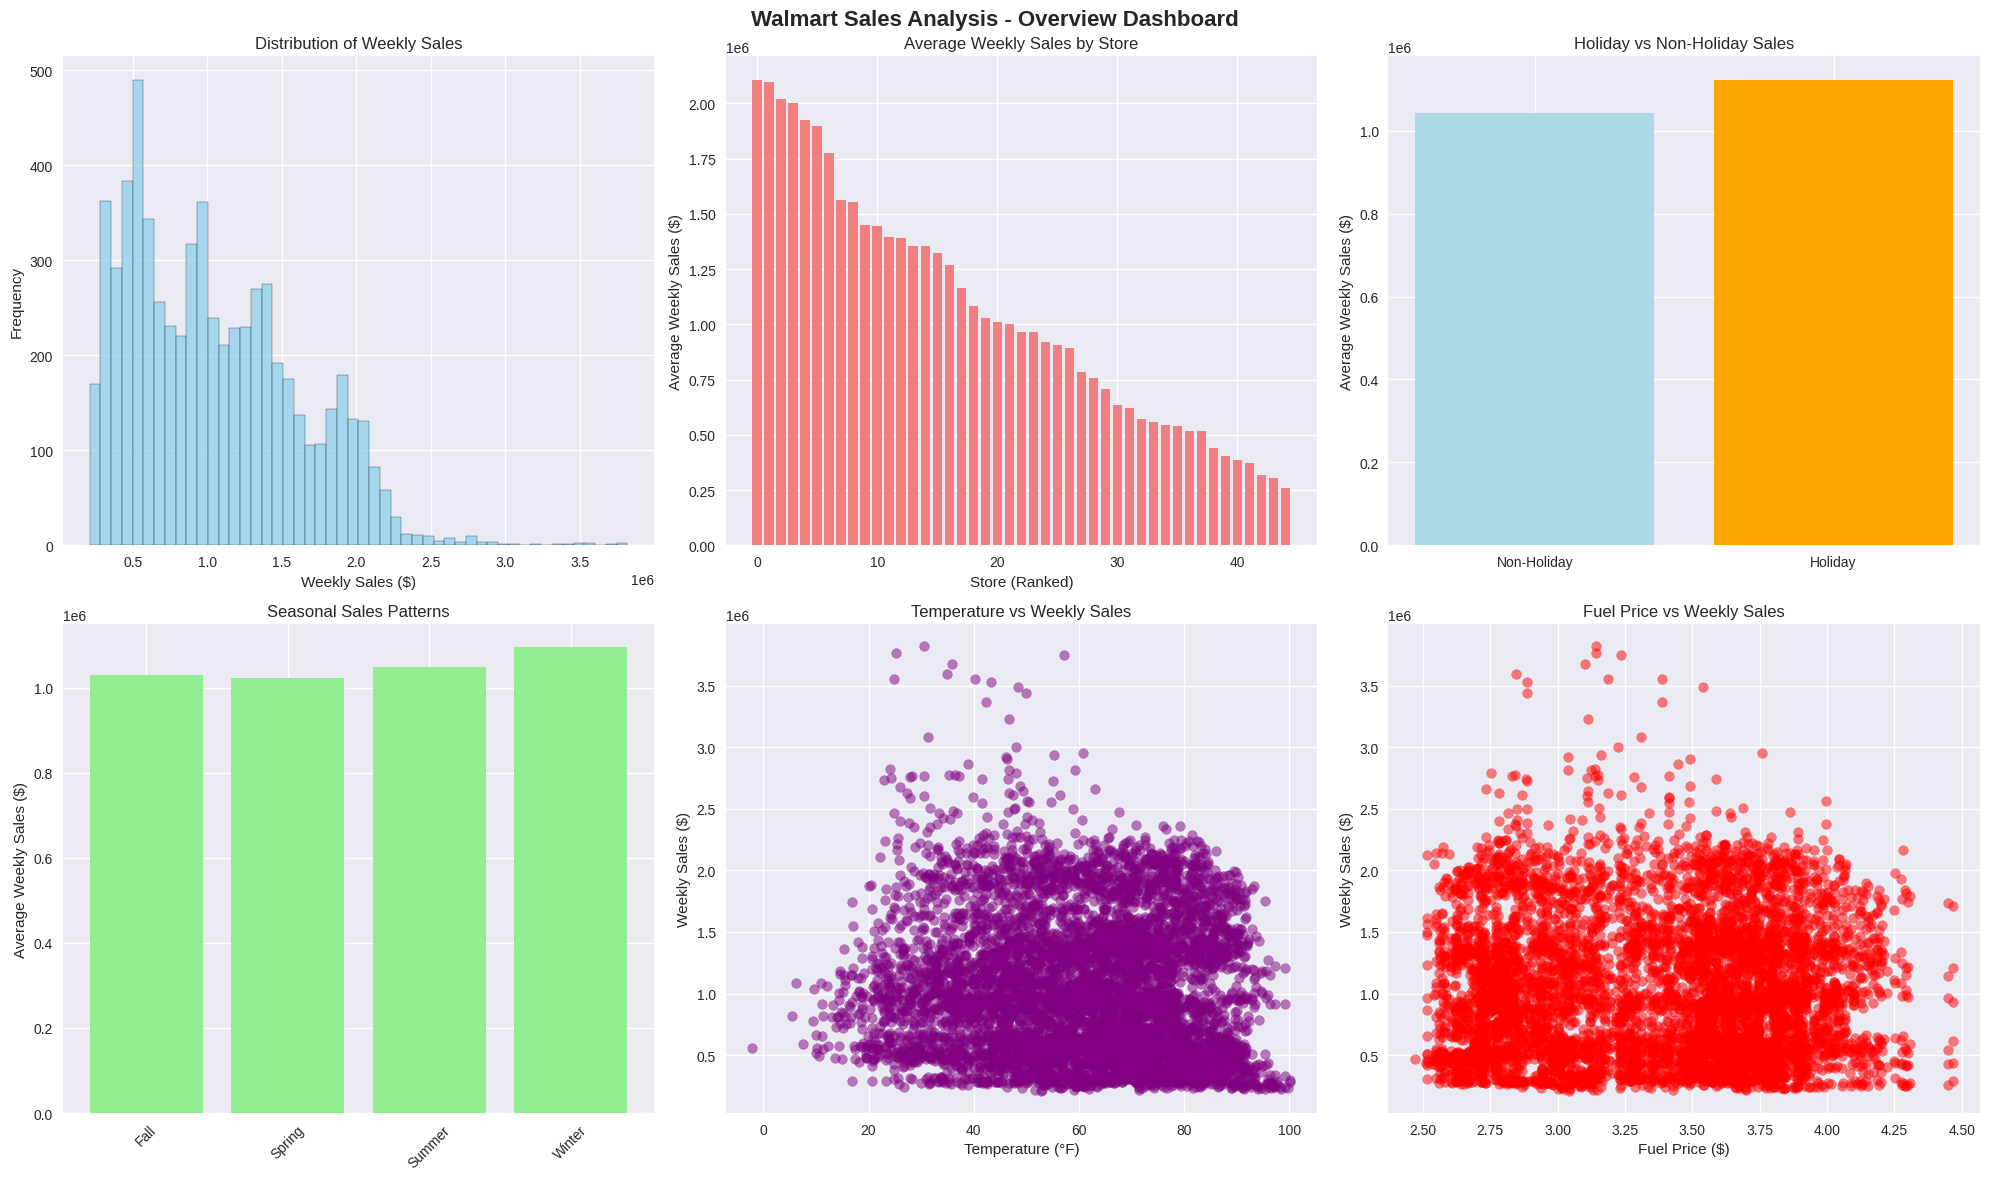

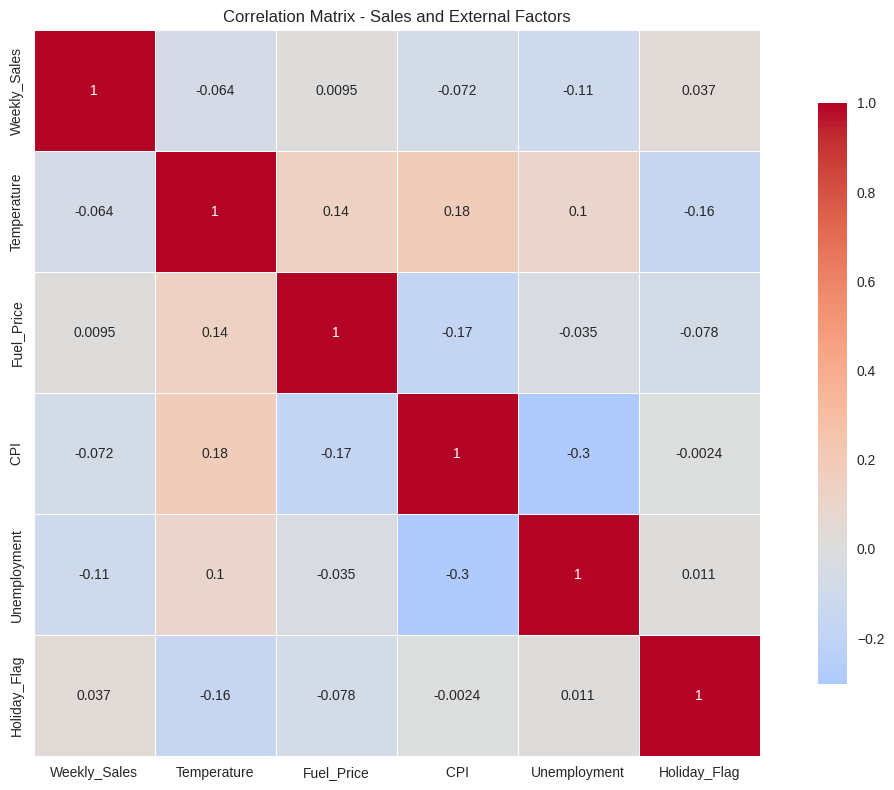

In [10]:
create_visualizations(df)

## 4. ADVANCED ANALYTICS

In [11]:
def advanced_analytics(df):
    """
    Perform advanced statistical analysis
    """
    print("\n🔬 ADVANCED ANALYTICS")
    print("-" * 30)
    
    # Time series analysis
    time_series = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
    time_series = time_series.sort_values('Date')
    
    # Calculate growth rates
    time_series['Sales_Growth'] = time_series['Weekly_Sales'].pct_change() * 100
    
    print("📈 TIME SERIES INSIGHTS:")
    print(f"Average weekly growth rate: {time_series['Sales_Growth'].mean():.2f}%")
    print(f"Sales volatility (std): {time_series['Sales_Growth'].std():.2f}%")
    
    # Seasonal decomposition visualization
    plt.figure(figsize=(15, 8))
    plt.plot(time_series['Date'], time_series['Weekly_Sales'], linewidth=2, color='blue')
    plt.title('Total Weekly Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Weekly Sales ($)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return time_series


🔬 ADVANCED ANALYTICS
------------------------------
📈 TIME SERIES INSIGHTS:
Average weekly growth rate: 0.52%
Sales volatility (std): 10.47%


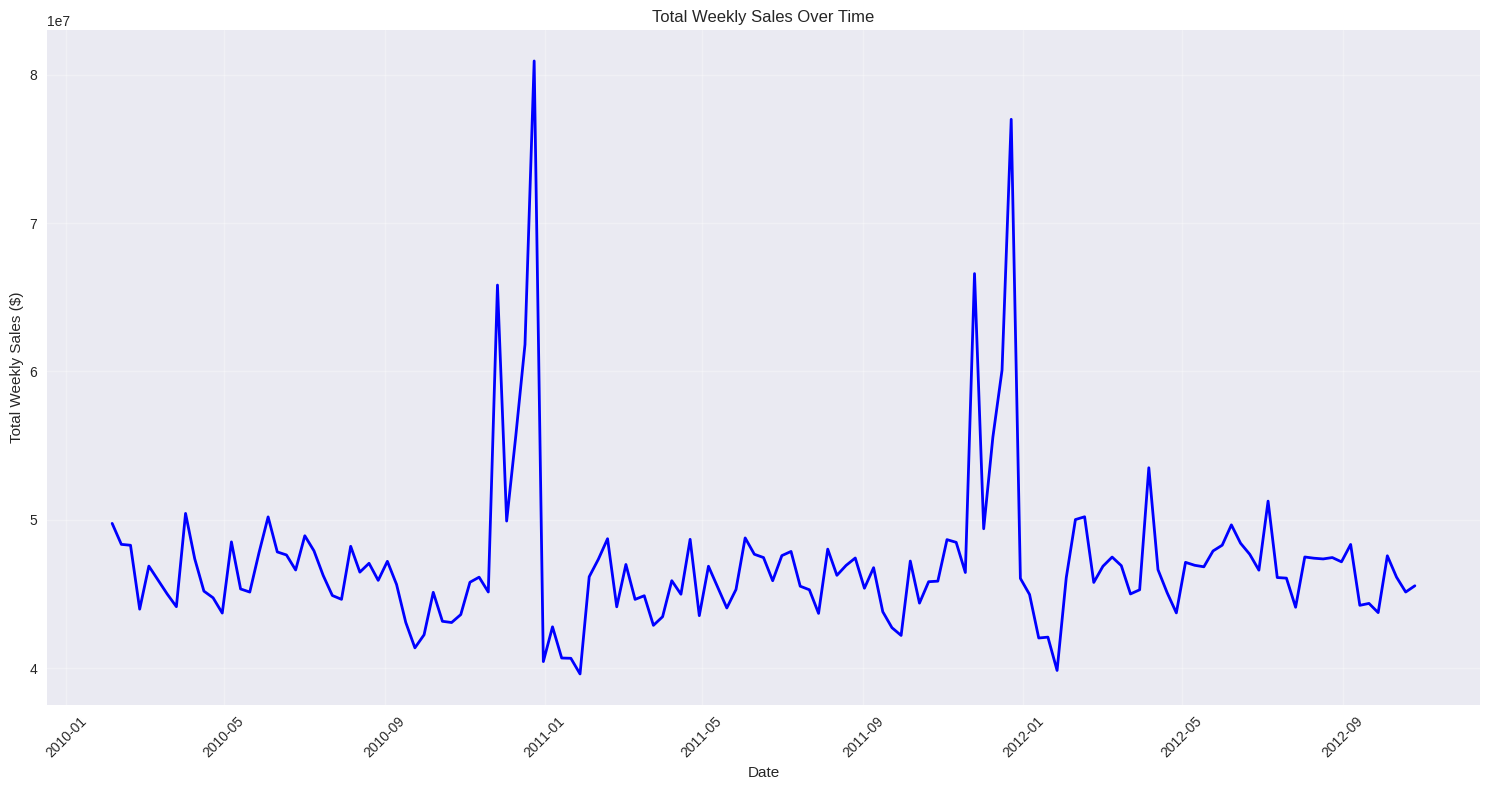

,Date,Weekly_Sales,Sales_Growth
0,2010-02-05,49750741,NaN
1,2010-02-12,48336676,-2.842299
2,2010-02-19,48276997,-0.123465
3,2010-02-26,43968572,-8.924385
4,2010-03-05,46871470,6.602211
...,...,...,...
138,2012-09-28,43734899,-1.397038
139,2012-10-05,47566640,8.761289
140,2012-10-12,46128511,-3.023398
141,2012-10-19,45122408,-2.181087


In [12]:
advanced_analytics(df)

## 5. INDIVIDUAL STORE ANALYSIS

In [13]:
def analyze_individual_stores(df):
    """
    Comprehensive analysis for each individual store
    """
    print("\n🏪 INDIVIDUAL STORE ANALYSIS")
    print("=" * 50)
    
    stores = sorted(df['Store_Number'].unique())
    store_analysis_results = {}
    
    for store_num in stores:
        print(f"\n📍 STORE #{store_num} ANALYSIS")
        print("-" * 30)
        
        # Filter data for current store
        store_data = df[df['Store_Number'] == store_num].copy()
        
        # Basic metrics
        total_records = len(store_data)
        avg_weekly_sales = store_data['Weekly_Sales'].mean()
        total_sales = store_data['Weekly_Sales'].sum()
        sales_std = store_data['Weekly_Sales'].std()
        min_sales = store_data['Weekly_Sales'].min()
        max_sales = store_data['Weekly_Sales'].max()
        
        # Performance metrics
        coefficient_of_variation = (sales_std / avg_weekly_sales) * 100
        
        # Holiday performance
        holiday_sales = store_data[store_data['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
        non_holiday_sales = store_data[store_data['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
        holiday_lift = ((holiday_sales - non_holiday_sales) / non_holiday_sales) * 100 if non_holiday_sales > 0 else 0
        
        # Seasonal performance
        seasonal_performance = store_data.groupby('Season')['Weekly_Sales'].mean()
        best_season = seasonal_performance.idxmax()
        worst_season = seasonal_performance.idxmin()
        seasonal_variance = seasonal_performance.std()
        
        # Trend analysis
        store_data_sorted = store_data.sort_values('Date')
        store_data_sorted['Sales_Growth'] = store_data_sorted['Weekly_Sales'].pct_change() * 100
        avg_growth_rate = store_data_sorted['Sales_Growth'].mean()
        
        # External factors correlation
        correlations = store_data[['Weekly_Sales', 'Temperature', 'Fuel_Price', ' CPI ', 'Unemployment']].corr()['Weekly_Sales']
        
        # Performance ranking among all stores
        all_store_averages = df.groupby('Store_Number')['Weekly_Sales'].mean()
        store_rank = (all_store_averages > avg_weekly_sales).sum() + 1
        total_stores = len(all_store_averages)
        percentile_rank = ((total_stores - store_rank + 1) / total_stores) * 100
        
        # Store analysis results
        store_analysis = {
            'store_number': store_num,
            'total_records': total_records,
            'average_weekly_sales': avg_weekly_sales,
            'total_sales': total_sales,
            'sales_volatility': coefficient_of_variation,
            'min_sales': min_sales,
            'max_sales': max_sales,
            'holiday_lift': holiday_lift,
            'best_season': best_season,
            'worst_season': worst_season,
            'seasonal_variance': seasonal_variance,
            'average_growth_rate': avg_growth_rate,
            'performance_rank': store_rank,
            'percentile_rank': percentile_rank,
            'temperature_correlation': correlations['Temperature'],
            'fuel_price_correlation': correlations['Fuel_Price'],
            'cpi_correlation': correlations[' CPI '],
            'unemployment_correlation': correlations['Unemployment']
        }
        
        store_analysis_results[store_num] = store_analysis
        
        # Print detailed analysis
        print(f"📊 PERFORMANCE METRICS:")
        print(f"   • Total Records: {total_records}")
        print(f"   • Average Weekly Sales: ${avg_weekly_sales:,.2f}")
        print(f"   • Total Sales: ${total_sales:,.2f}")
        print(f"   • Sales Range: ${min_sales:,.2f} - ${max_sales:,.2f}")
        print(f"   • Sales Volatility: {coefficient_of_variation:.1f}%")
        print(f"   • Store Rank: #{store_rank} out of {total_stores} ({percentile_rank:.1f}th percentile)")
        
        print(f"\n🎯 BUSINESS INSIGHTS:")
        print(f"   • Holiday Sales Lift: {holiday_lift:+.1f}%")
        print(f"   • Best Season: {best_season} (${seasonal_performance[best_season]:,.2f})")
        print(f"   • Worst Season: {worst_season} (${seasonal_performance[worst_season]:,.2f})")
        print(f"   • Seasonal Consistency: {'High' if seasonal_variance < avg_weekly_sales * 0.1 else 'Moderate' if seasonal_variance < avg_weekly_sales * 0.2 else 'Low'}")
        print(f"   • Average Growth Rate: {avg_growth_rate:+.2f}%")
        
        print(f"\n🌡️ EXTERNAL FACTORS IMPACT:")
        print(f"   • Temperature Correlation: {correlations['Temperature']:+.3f}")
        print(f"   • Fuel Price Correlation: {correlations['Fuel_Price']:+.3f}")
        print(f"   • CPI Correlation: {correlations[' CPI ']:+.3f}")
        print(f"   • Unemployment Correlation: {correlations['Unemployment']:+.3f}")
        
        # Performance classification
        if percentile_rank >= 80:
            performance_tier = "⭐ TOP PERFORMER"
        elif percentile_rank >= 60:
            performance_tier = "🚀 STRONG PERFORMER"
        elif percentile_rank >= 40:
            performance_tier = "📈 AVERAGE PERFORMER"
        elif percentile_rank >= 20:
            performance_tier = "⚠️ BELOW AVERAGE"
        else:
            performance_tier = "🔴 NEEDS ATTENTION"
        
        print(f"\n🏆 OVERALL ASSESSMENT: {performance_tier}")
        
        # Specific recommendations
        print(f"\n💡 STRATEGIC RECOMMENDATIONS:")
        
        if holiday_lift < 5:
            print(f"   • Improve holiday marketing - current lift is only {holiday_lift:.1f}%")
        elif holiday_lift > 20:
            print(f"   • Excellent holiday performance - leverage this success year-round")
        
        if coefficient_of_variation > 30:
            print(f"   • High sales volatility ({coefficient_of_variation:.1f}%) - focus on consistent execution")
        elif coefficient_of_variation < 15:
            print(f"   • Very stable sales pattern - consider growth initiatives")
        
        if correlations['Temperature'] > 0.3:
            print(f"   • Strong positive temperature correlation - optimize seasonal inventory")
        elif correlations['Temperature'] < -0.3:
            print(f"   • Strong negative temperature correlation - adjust AC/heating product mix")
        
        if avg_growth_rate < -2:
            print(f"   • Declining sales trend - urgent intervention needed")
        elif avg_growth_rate > 2:
            print(f"   • Growing sales trend - maintain momentum with expansion support")
        
        print("-" * 50)
    
    return store_analysis_results



In [14]:
store_results = analyze_individual_stores(df)


🏪 INDIVIDUAL STORE ANALYSIS

📍 STORE #1 ANALYSIS
------------------------------
📊 PERFORMANCE METRICS:
   • Total Records: 143
   • Average Weekly Sales: $1,555,264.43
   • Total Sales: $222,402,813.00
   • Sales Range: $1,316,899.00 - $2,387,950.00
   • Sales Volatility: 10.0%
   • Store Rank: #9 out of 45 (82.2th percentile)

🎯 BUSINESS INSIGHTS:
   • Holiday Sales Lift: +7.7%
   • Best Season: Winter ($1,620,619.87)
   • Worst Season: Summer ($1,528,106.95)
   • Seasonal Consistency: High
   • Average Growth Rate: +0.50%

🌡️ EXTERNAL FACTORS IMPACT:
   • Temperature Correlation: -0.223
   • Fuel Price Correlation: +0.125
   • CPI Correlation: +0.213
   • Unemployment Correlation: -0.098

🏆 OVERALL ASSESSMENT: ⭐ TOP PERFORMER

💡 STRATEGIC RECOMMENDATIONS:
   • Very stable sales pattern - consider growth initiatives
--------------------------------------------------

📍 STORE #2 ANALYSIS
------------------------------
📊 PERFORMANCE METRICS:
   • Total Records: 143
   • Average Weekly 

In [15]:
def create_store_comparison_dashboard(store_results):
    """
    Create a comprehensive dashboard comparing all stores
    """
    print("\n📊 STORE COMPARISON DASHBOARD")
    print("-" * 40)
    
    # Convert results to DataFrame for easier analysis
    results_df = pd.DataFrame(store_results).T
    
    # Create comprehensive comparison plots
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Store Performance Comparison Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Average sales comparison
    axes[0, 0].bar(results_df.index, results_df['average_weekly_sales'], color='skyblue')
    axes[0, 0].set_title('Average Weekly Sales by Store')
    axes[0, 0].set_xlabel('Store Number')
    axes[0, 0].set_ylabel('Average Weekly Sales ($)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Sales volatility comparison
    colors = ['red' if x > 30 else 'orange' if x > 20 else 'green' for x in results_df['sales_volatility']]
    axes[0, 1].bar(results_df.index, results_df['sales_volatility'], color=colors)
    axes[0, 1].set_title('Sales Volatility by Store (CV%)')
    axes[0, 1].set_xlabel('Store Number')
    axes[0, 1].set_ylabel('Coefficient of Variation (%)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Holiday lift comparison
    colors = ['red' if x < 0 else 'orange' if x < 10 else 'green' for x in results_df['holiday_lift']]
    axes[0, 2].bar(results_df.index, results_df['holiday_lift'], color=colors)
    axes[0, 2].set_title('Holiday Sales Lift by Store (%)')
    axes[0, 2].set_xlabel('Store Number')
    axes[0, 2].set_ylabel('Holiday Lift (%)')
    axes[0, 2].tick_params(axis='x', rotation=45)
    axes[0, 2].axhline(y=0, color='black', linestyle='--', linewidth=1)
    
    # 4. Performance ranking
    axes[1, 0].bar(results_df.index, results_df['percentile_rank'], color='lightcoral')
    axes[1, 0].set_title('Performance Percentile Ranking')
    axes[1, 0].set_xlabel('Store Number')
    axes[1, 0].set_ylabel('Percentile Rank')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 5. Growth rate comparison
    colors = ['red' if x < -1 else 'orange' if x < 1 else 'green' for x in results_df['average_growth_rate']]
    axes[1, 1].bar(results_df.index, results_df['average_growth_rate'], color=colors)
    axes[1, 1].set_title('Average Growth Rate by Store')
    axes[1, 1].set_xlabel('Store Number')
    axes[1, 1].set_ylabel('Average Growth Rate (%)')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
    
    # 6. Total sales comparison
    axes[1, 2].bar(results_df.index, results_df['total_sales'], color='lightgreen')
    axes[1, 2].set_title('Total Sales by Store')
    axes[1, 2].set_xlabel('Store Number')
    axes[1, 2].set_ylabel('Total Sales ($)')
    axes[1, 2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("📈 STORE PERFORMANCE SUMMARY:")
    print(f"Best Performing Store (Sales): #{results_df['average_weekly_sales'].idxmax()} (${results_df['average_weekly_sales'].max():,.2f})")
    print(f"Worst Performing Store (Sales): #{results_df['average_weekly_sales'].idxmin()} (${results_df['average_weekly_sales'].min():,.2f})")
    print(f"Most Volatile Store: #{results_df['sales_volatility'].idxmax()} ({results_df['sales_volatility'].max():.1f}% CV)")
    print(f"Most Stable Store: #{results_df['sales_volatility'].idxmin()} ({results_df['sales_volatility'].min():.1f}% CV)")
    print(f"Best Holiday Performance: #{results_df['holiday_lift'].idxmax()} ({results_df['holiday_lift'].max():.1f}% lift)")
    print(f"Fastest Growing Store: #{results_df['average_growth_rate'].idxmax()} ({results_df['average_growth_rate'].max():+.2f}%)")
    
    return results_df


📊 STORE COMPARISON DASHBOARD
----------------------------------------


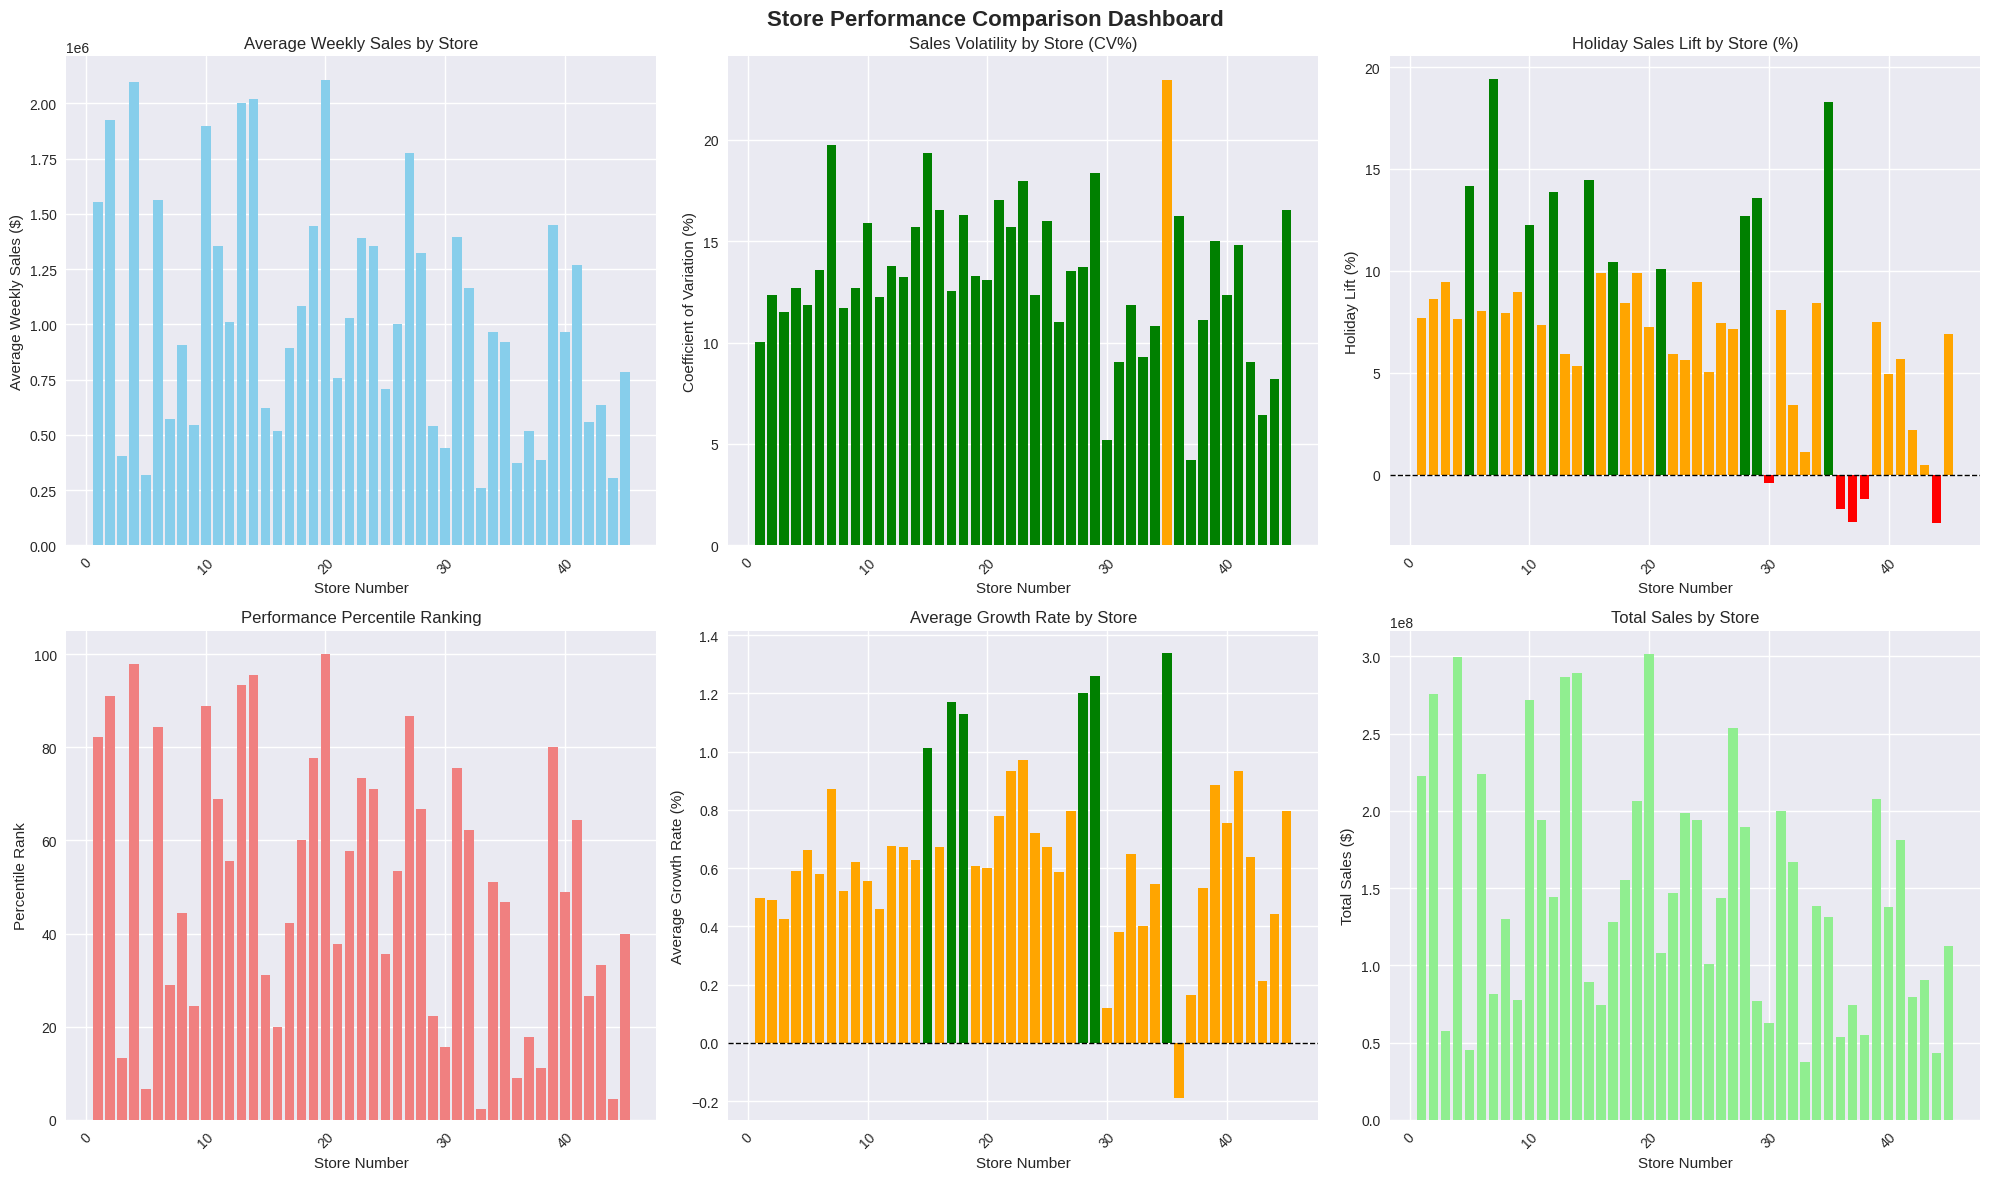

📈 STORE PERFORMANCE SUMMARY:
Best Performing Store (Sales): #20 ($2,107,676.89)
Worst Performing Store (Sales): #33 ($259,861.70)
Most Volatile Store: #35 (23.0% CV)
Most Stable Store: #37 (4.2% CV)
Best Holiday Performance: #7 (19.4% lift)
Fastest Growing Store: #35 (+1.34%)


,store_number,total_records,average_weekly_sales,total_sales,sales_volatility,min_sales,max_sales,holiday_lift,best_season,worst_season,seasonal_variance,average_growth_rate,performance_rank,percentile_rank,temperature_correlation,fuel_price_correlation,cpi_correlation,unemployment_correlation
1,1,143,1555264.426573,222402813,10.029212,1316899,2387950,7.678956,Winter,Summer,42579.948519,0.496896,9,82.222222,-0.222701,0.124592,0.213108,-0.097955
2,2,143,1925751.335664,275382441,12.342389,1650394,3436008,8.622795,Winter,Fall,94058.893248,0.489105,5,91.111111,-0.297673,-0.196375,-0.062192,0.066325
3,3,143,402704.447552,57586736,11.502138,339597,605990,9.435006,Winter,Summer,19982.414211,0.42393,40,13.333333,-0.377524,0.140887,0.319719,-0.230414
4,4,143,2094712.958042,299543953,12.708252,1762539,3676389,7.657427,Winter,Spring,95661.126522,0.588567,2,97.777778,-0.225582,0.211549,0.360601,-0.337015
5,5,143,318011.874126,45475698,11.86684,260637,507900,14.166544,Winter,Summer,8545.656452,0.662404,43,6.666667,-0.175517,0.167353,0.301807,-0.207042
6,6,143,1564728.174825,223756129,13.582284,1261253,2727575,8.027996,Winter,Fall,66415.000537,0.579509,8,84.444444,-0.084863,-0.103356,-0.005384,0.044251
7,7,143,570617.27972,81598271,19.730468,372674,1059715,19.439218,Summer,Spring,67133.677466,0.870749,33,28.888889,0.015077,0.110356,0.274913,-0.165382
8,8,143,908749.468531,129951174,11.695286,772539,1511641,7.92119,Winter,Summer,42850.276084,0.522531,26,44.444444,-0.312324,0.029752,0.123086,-0.05258
9,9,143,543980.552448,77789219,12.68955,452905,905325,8.944049,Winter,Summer,17705.809159,0.6225,35,24.444444,-0.208344,0.205403,0.289921,-0.191534
10,10,143,1899424.573427,271617714,15.913351,1627707,3749058,12.236251,Winter,Summer,148040.543653,0.556784,6,88.888889,-0.432569,-0.185058,-0.089212,0.131908


In [16]:
create_store_comparison_dashboard(store_results)

In [17]:
def generate_executive_summary(df, store_results):
    """
    Generate comprehensive executive summary
    """
    print("\n" + "="*60)
    print("🎯 EXECUTIVE SUMMARY - WALMART SALES ANALYSIS")
    print("="*60)
    
    # Overall business metrics
    total_sales = df['Weekly_Sales'].sum()
    avg_weekly_sales = df['Weekly_Sales'].mean()
    total_stores = df['Store_Number'].nunique()
    analysis_period = f"{df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}"
    
    print(f"\n📊 BUSINESS OVERVIEW:")
    print(f"   • Analysis Period: {analysis_period}")
    print(f"   • Total Stores Analyzed: {total_stores}")
    print(f"   • Total Sales Volume: ${total_sales:,.2f}")
    print(f"   • Average Weekly Sales: ${avg_weekly_sales:,.2f}")
    print(f"   • Total Data Points: {len(df):,} records")
    
    # Performance insights
    results_df = pd.DataFrame(store_results).T
    
    top_performers = results_df[results_df['percentile_rank'] >= 80]
    needs_attention = results_df[results_df['percentile_rank'] <= 20]
    
    print(f"\n🏆 PERFORMANCE INSIGHTS:")
    print(f"   • Top Performers (80th+ percentile): {len(top_performers)} stores")
    print(f"   • Stores Needing Attention (20th- percentile): {len(needs_attention)} stores")
    print(f"   • Average Holiday Sales Lift: {results_df['holiday_lift'].mean():.1f}%")
    print(f"   • Average Sales Growth Rate: {results_df['average_growth_rate'].mean():+.2f}%")
    
    # Key recommendations
    print(f"\n💡 KEY STRATEGIC RECOMMENDATIONS:")
    
    high_volatility_stores = results_df[results_df['sales_volatility'] > 30]
    if len(high_volatility_stores) > 0:
        print(f"   • {len(high_volatility_stores)} stores show high volatility - implement consistency programs")
    
    poor_holiday_performers = results_df[results_df['holiday_lift'] < 5]
    if len(poor_holiday_performers) > 0:
        print(f"   • {len(poor_holiday_performers)} stores underperform during holidays - enhance seasonal marketing")
    
    declining_stores = results_df[results_df['average_growth_rate'] < -1]
    if len(declining_stores) > 0:
        print(f"   • {len(declining_stores)} stores show declining trends - require immediate intervention")
    
    print(f"   • Focus on replicating success factors from top-performing stores")
    print(f"   • Implement data-driven inventory management based on external factors")
    print(f"   • Develop store-specific strategies based on individual performance patterns")
    
    print("\n" + "="*60)

In [18]:
generate_executive_summary(df,store_results)


🎯 EXECUTIVE SUMMARY - WALMART SALES ANALYSIS

📊 BUSINESS OVERVIEW:
   • Analysis Period: 2010-02-05 to 2012-10-26
   • Total Stores Analyzed: 45
   • Total Sales Volume: $6,737,219,008.00
   • Average Weekly Sales: $1,046,964.88
   • Total Data Points: 6,435 records

🏆 PERFORMANCE INSIGHTS:
   • Top Performers (80th+ percentile): 10 stores
   • Stores Needing Attention (20th- percentile): 9 stores
   • Average Holiday Sales Lift: 7.4%
   • Average Sales Growth Rate: +0.67%

💡 KEY STRATEGIC RECOMMENDATIONS:
   • 10 stores underperform during holidays - enhance seasonal marketing
   • Focus on replicating success factors from top-performing stores
   • Implement data-driven inventory management based on external factors
   • Develop store-specific strategies based on individual performance patterns

